## Diffusion in 1D

### Central Difference Approximation of Second Order Derivatives

\begin{eqnarray}
u_{i+1} & = & u_i + \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i + \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_ih.o.t \\ 
u_{i-1} & = & u_i - \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i - \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_i h.o.t \\
\end{eqnarray}

Adding these two equations together, we arrive at:

\begin{eqnarray}
\frac{\partial^2 u}{\partial x^2} & = & \frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2} +
\frac{\Delta x^2}{12} \frac{\partial^4 u}{\partial x^4} + h.o.t \\ 
\end{eqnarray}

### The Heat Equation

In the above, $u$ could represent many different physical quantities.  One of the more interesting problems to consider is the diffusion of heat in a substance, and in this case, $u$ is the temperature of the material, over space and time.  The so-called heat equation is given by:

\begin{equation}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0
\end{equation}

where $\alpha$ is the thermal diffusivity of the material.  As before, we use the forward difference for the time derivative, and the central difference approximation for the second order spatial derivative.  Why is this so?  Well, time moves $forward$, and so using the forward difference makes sense for the time derivative.  The central difference approximation is $isotropic$ in the forward and backward directions, and since normal physical diffusion is directionally isotropic (in typical physical systems), this also makes sense.

\begin{equation}
\frac{u_i^{n+1} -  u_i^n}{\Delta t} - \alpha \left( \frac{u^n_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2} \right) = 0
\end{equation}

\begin{equation}
u_i^{n+1} =  u_i^n + \frac{\alpha \Delta t}{\Delta x^2} \left( u^n_{i+1} - 2 u^n_i + u^n_{i-1} \right)
\end{equation}

Key Points:

In the problems studied earlier in the course, where we looked at differential equations of a single variable, we saw that we could basically "brute force" a numerical solution by keeping the time step small enough.  However, as we see in this case, it is a combination of the time step and the spatial step size that matters:

$$ r = \frac{\alpha \Delta t}{\Delta x^2} $$

We require $r < \frac{1}{2}$ for $stable$ solutions!  One approach is to choose a spatial step size that is appropriate for the physical size of the problem, and then choose a time step appropriately based on this.  Alternatively, we can choose $nx$ and $nt$ and then check that $r < \frac{1}{2}$.

In [13]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [14]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

# Diffusion of Heat in a 1D metal bar

Consider the problem of a long thin metal bar (length = 20m).  The initial temperature distribution is that there exists a "hot spot" at the center of the bar.  We seek to understand how the temperature over the entire bar varies with time.

In [15]:
# We define the x-axis to start at x=0.0m and end at x=20.0m.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.

xrange = 20.0 # in meters
trange = 24.0 # in seconds

# Note, the indices of the x-values will go from 0 to nx-1
nx = 401  # try changing this number and Run All ... what happens?
dx = xrange / (nx-1)

# Note, the indices of the timesteps will go from 0 to nt-1
nt = 4001    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

thermal = 0.1
print ("Stability constant = %0.4f" % (thermal*dt/dx**2))

# stability for thermal*dt/dx**2 <= 1/2
dt_max = 0.5*dx**2/thermal
nt_min = trange/dt_max+1
print ("Minimum number of timesteps = %0.0f" % nt_min)

x = np.linspace(0,xrange,nx)

# We might look at different approaches for modeling the "hot spot" at the center of the bar.
pulseShapeChoice = 1

Stability constant = 0.2400
Minimum number of timesteps = 1921


In [16]:
def get_uinit():
  
  # Set the wavefunction equal to all ones, initially
  u = np.ones(nx)      #numpy function ones()

  if (pulseShapeChoice == 1):
    # Test Case 1: Square Pulse
    u[int(9.75 / dx):int(10.25 / dx + 1)] = 2  #setting u = 2 between 9.75 and 10.25
  elif pulseShapeChoice == 2:
    # Test Case 2:  Gaussian Pulse
    mu = 10.0
    sigma = 0.25
    for i in range(len(u)):
      u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)
  else:
    # Test Case 3: Sinusoidal Distribution
    wavelength = 1.2*xrange
    amplitude = 0.5
    for i in range(len(u)):
      u[i] = u[i]+amplitude*np.sin(2.0*np.pi*x[i]/wavelength)
          
  return u


Integral =  11.0


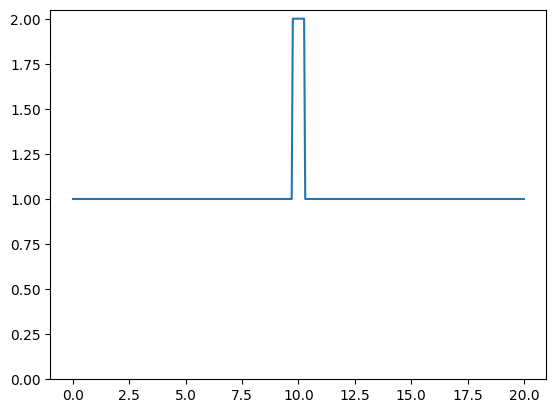

In [17]:
plt.plot(x, u)
plt.ylim(0)
print ("Integral = ",u.sum()-len(x))

In [18]:
u = get_uinit()

for n in range(nt):  
  
    un = u.copy() ##copy the existing values of u into un
    
    # The starting value of i is 1, as we need the indices
    # 0, 1, and 2 to evaluate the i=1 value at the next time step
    
    # The i index runs from 0 to nx-1 (0 to 400) inclusive.
    # So, the final value of i needs to be nx-2, as we need
    # the indices nx-3, nx-2, and nx-1 to evaluate the i=nx-1 value
    # at the next time step.
    
    for i in range(1, nx-1):
        u[i] = un[i] + thermal * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])

Integral =  10.999883441670704


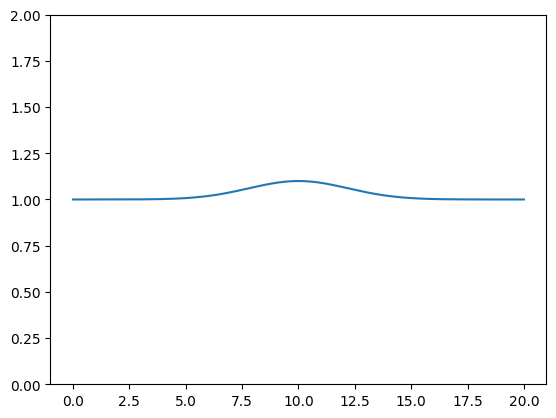

In [19]:
plt.plot(x, u)
plt.ylim(0,2)

print ("Integral = ",u.sum()-len(x))

Stability parameter = 0.5000 
nt_min = 1921
Integral =  11.0
Integral =  10.999884567011975
Integral =  10.999884602457257
Integral =  10.9998845963147


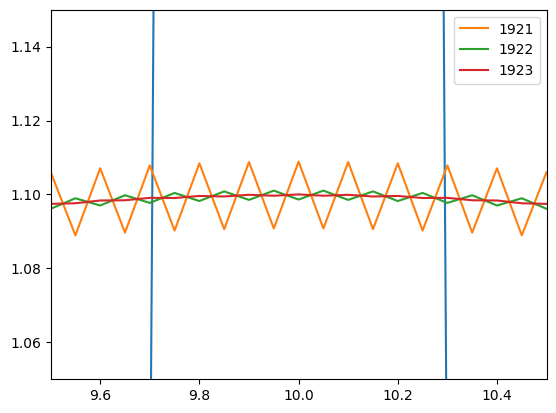

In [21]:
xrange = 20.0
trange = 24.0
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 1921    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)

print ("Stability parameter = %0.4f " % (thermal*dt/dx**2))
print ("nt_min = %0.0f" % (2*thermal*trange*(nx-1)**2/xrange**2+1))

x = np.linspace(0, xrange, nx)
u = get_uinit()

plt.plot(x, u)
print ("Integral = ",u.sum()-len(x))

for ntt in range(nt,nt+3):
  dt = trange/(ntt-1)
  u = get_uinit()
      
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] + thermal * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])
  plt.plot(x, u, label=str(ntt))
  plt.ylim(1.05,1.15)
  plt.xlim(9.5,10.5)
  plt.legend()
  print ("Integral = ",u.sum()-len(x))

Integral =  10.999884567011975
Integral =  10.999884602457257
Integral =  10.9998845963147


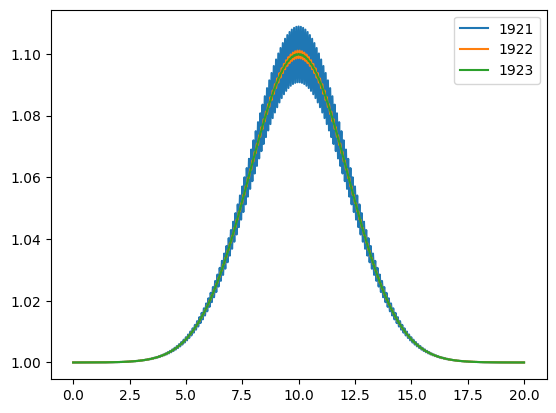

In [22]:
for ntt in range(nt,nt+3):
  dt = trange/(ntt-1)

  u = get_uinit()
  
  for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] + thermal * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])
          
  plt.plot(x, u, label=str(ntt))
  plt.legend()
  print ("Integral = ",u.sum()-len(x))